In [14]:
from common import utils, data, models, argbind, viz
import nussl
import torch
import os
from contextlib import contextmanager
import matplotlib.pyplot as plt
import numpy as np

argbind.ARGS['args.debug'] = True
utils.logger(level='info')

LABELS = ['bass', 'drums', 'other', 'vocals']

@contextmanager
def scope(output_folder, override_args={}):
    with utils.chdir(output_folder):
        args = argbind.load_args('./args.yml')
        for key, val in override_args.items():
            args[key] = val
        with argbind.scope(args):
            yield args

test/logger <- level=info


10/03/2020 04:26:42 AM | utils.py:25 Switched working directory to ../../../output/musdb18/


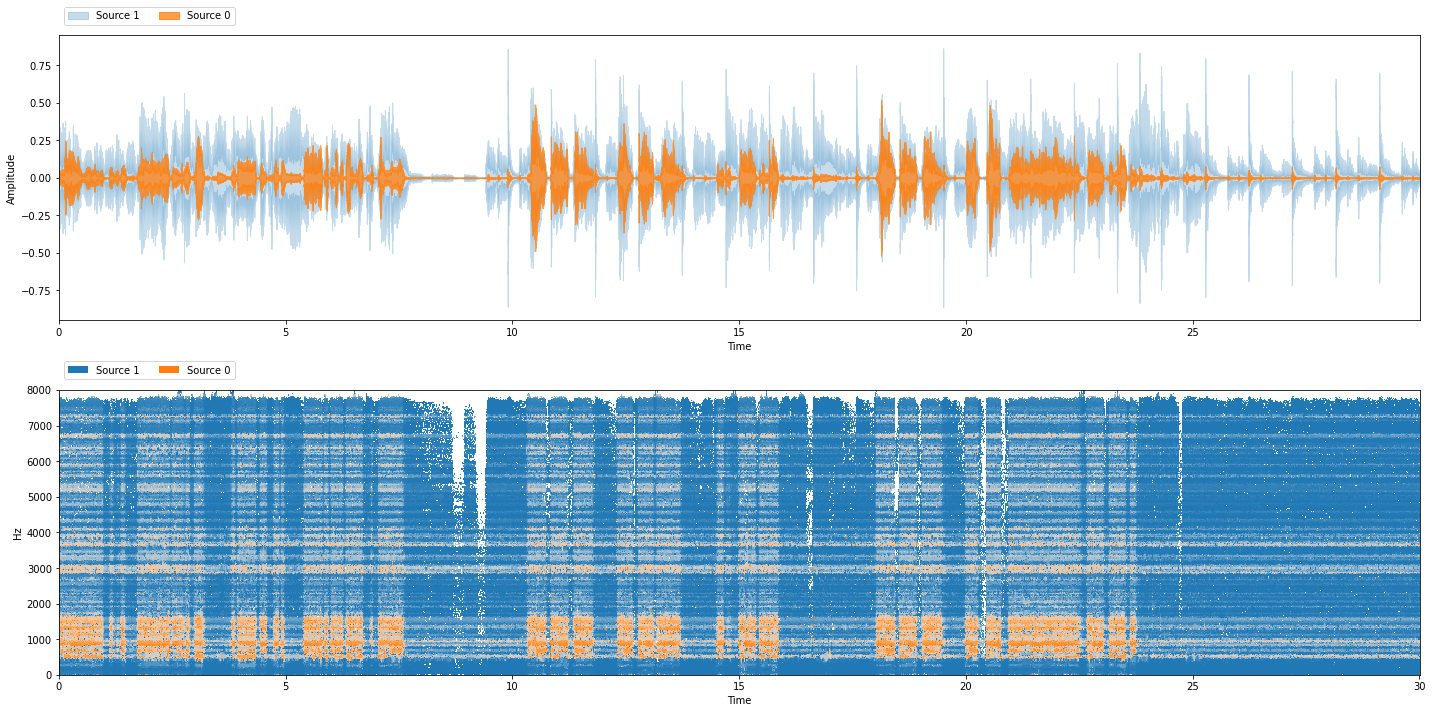


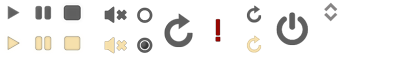
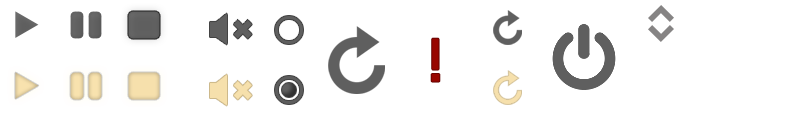
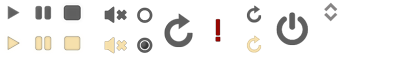

10/03/2020 04:27:06 AM | utils.py:29 Returning to /home/prem/research/tutorial/common/exp/notebooks


In [16]:
overrides = {
    'device.use': 'cpu',
    'deep_mask_estimation.model_path': 'checkpoints/latest.model.pth',
}

with scope('../../../output/musdb18/', overrides) as args:    
    device = utils.device()
    separator = models.deep_mask_estimation(device)
    stft_params, sample_rate = data.signal()
    
    with argbind.scope(args, 'test'):
        tfm, new_labels = data.transform(stft_params, sample_rate, 'vocals', True)
        dataset = data.mixer(stft_params, tfm)
        
    item = dataset[np.random.randint(len(dataset))]

    separator.audio_signal = item['mix']
    estimates = separator()
    estimates.append(item['mix'] - estimates[0])
    
    viz.embed(estimates)